# Linear Regression Closed-Form method:

-   Calculam pe baza unei formule, nu o sa folosim Gradient Descent

In [1]:
import numpy as np

In [2]:
class LinearRegressionClosed:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = 0.0
        
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        Xb = np.c_[np.ones((X.shape[0], 1)), X]
        
        A = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y
        self.intercept_ = A[0]
        self.coef_ = A[1:]
            
    def predict(self, X):
        X = np.array(X)
        
        return X @ self.coef_ + self.intercept_

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
req = LinearRegressionClosed()

X, y = fetch_california_housing(return_X_y=True)

req.fit(X, y)

y_pred = req.predict(X)

print(r2_score(y, y_pred))

0.606232685199805


In [5]:
regsk = LinearRegression()

regsk.fit(X, y)

y_pred = regsk.predict(X)

print(r2_score(y, y_pred))

0.606232685199805


In [6]:
import matplotlib.pyplot as plt

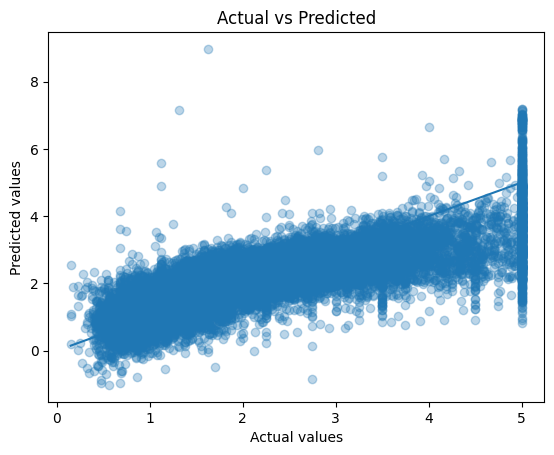

In [7]:
plt.figure()
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.show()


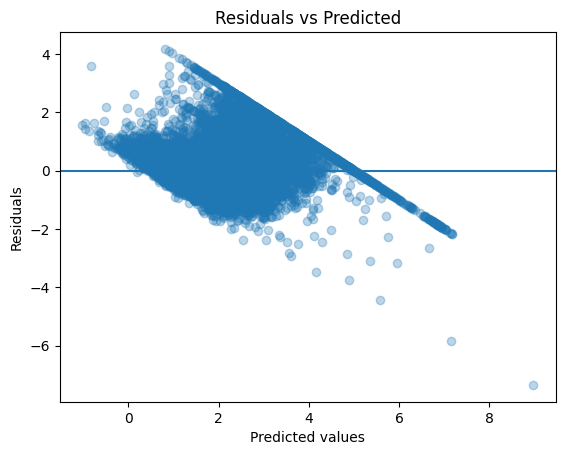

In [8]:
residuals = y - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

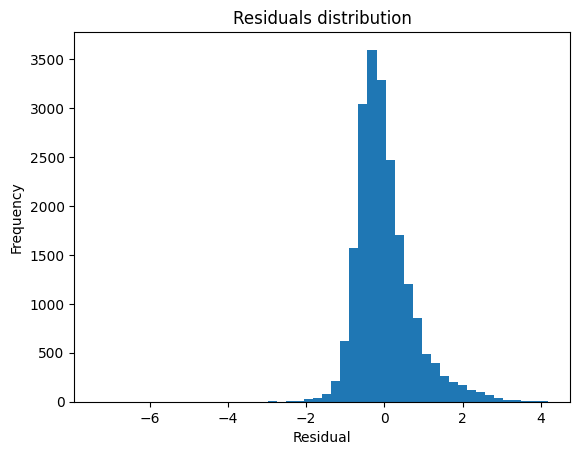

In [9]:
plt.figure()
plt.hist(residuals, bins=50)
plt.title("Residuals distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

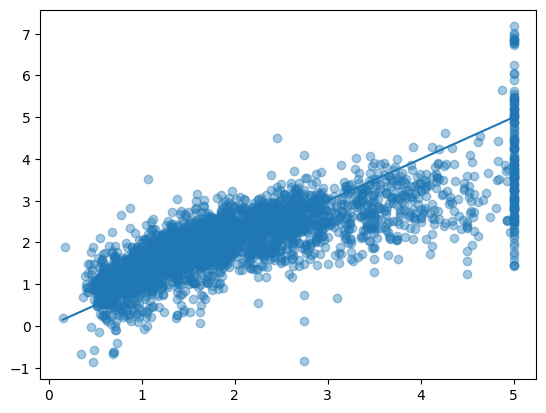

In [10]:
idx = np.random.choice(len(y), size=3000, replace=False)

plt.figure()
plt.scatter(y[idx], y_pred[idx], alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()